In [ ]:
"""
    File : stripplotYoungestSubclones.ipynb
    Plot : stripplot of the distances from regions harbouring recent subclones to tumour margin
    Inputs : (related to several figure panels)
        SourceData_Fig4d.xlsx
        SourceData_ExtendedData_Fig7a.xlsx
        
    Note that the positions of data points may slightly differ in different
    iterations of Seaborn stripplot function call
"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path_to_all_source_data = "../Source data for figures"

In [18]:
def read_and_plot(sheet_names):
    def config_font_size(figsize):
        params = {'legend.fontsize': 6,
                  'figure.figsize': figsize,
                 'axes.labelsize': 8,
                 'axes.titlesize': 8,
                 'xtick.labelsize':6,
                 'ytick.labelsize':6,
                 'pdf.fonttype':42}
        plt.rcParams.update(params)
        
    conditions = [
        "S p=2e-4", "S p=6e-4", "S p=1e-3", 
        "V p=2e-4", "V p=6e-4", "V p=1e-3"
    ]
    colors = [
        '#FFCCCC', '#FF6666', '#FF0000',
        '#CCCCFF', '#6666FF', '#0000FF'
    ]

    for sheet_name in excelfile.sheet_names:
        youngest_clones_location_all = pd.read_excel(
            excelfile, 
            sheet_name=sheet_name
        )
        youngest_clones_location_all['SimID'] = youngest_clones_location_all['SimID'].map(str)

        print(sheet_name)
        
        fig = plt.figure(dpi=300)
        ax = fig.add_axes([0.2,0.2,0.75,0.75])

        config_font_size(figsize = (3,3))

        tumours_to_plot = []
        for condition, color in zip(
            conditions, colors
        ):

            data_plot = youngest_clones_location_all.loc[
                youngest_clones_location_all.Condition == condition
            ]

            df_location_by_tumour_mean = data_plot.dropna().groupby('SimID', as_index=False).agg(
                {'D2Margin':'mean'}
            ).sort_values('D2Margin')
            order_tumours = df_location_by_tumour_mean.SimID.values.tolist()
            tumours_to_plot.extend(order_tumours)
            
            ax.scatter(
                df_location_by_tumour_mean.D2Margin,
                df_location_by_tumour_mean.SimID,
                s = 0.5, marker = '_', c = color, zorder = 3,
                label = condition
            )


        sns.stripplot(
            data=youngest_clones_location_all,
            y='SimID',
            x='D2Margin',
            orient='h',
            ax=ax,
            size=0.25,
            order=tumours_to_plot,
            color='grey',
            alpha=0.5,
            zorder=2
        )

        ax.axvline(x = 10, c = 'grey', lw = 0.5, zorder = 1, ls = '--')

        ax.tick_params(axis='y', which='major', labelsize=3.5)

        ax.set_xlabel('Distance to margin (mm)')
        ax.set_ylabel('ID')

        ax.set_yticks([])

        plt.legend(loc = 'upper right')
        plt.show()
        plt.close()

# Figure 4d

In [3]:
path_to_excelfile = os.path.join(
    path_to_all_source_data,
    "Source_Data_Figure_4",
    "SourceData_Fig4d.xlsx"
)

In [4]:
excelfile = pd.ExcelFile(path_to_excelfile)
excelfile.sheet_names

['SourceDataFig4di', 'SourceDataFig4dii']

SourceDataFig4di


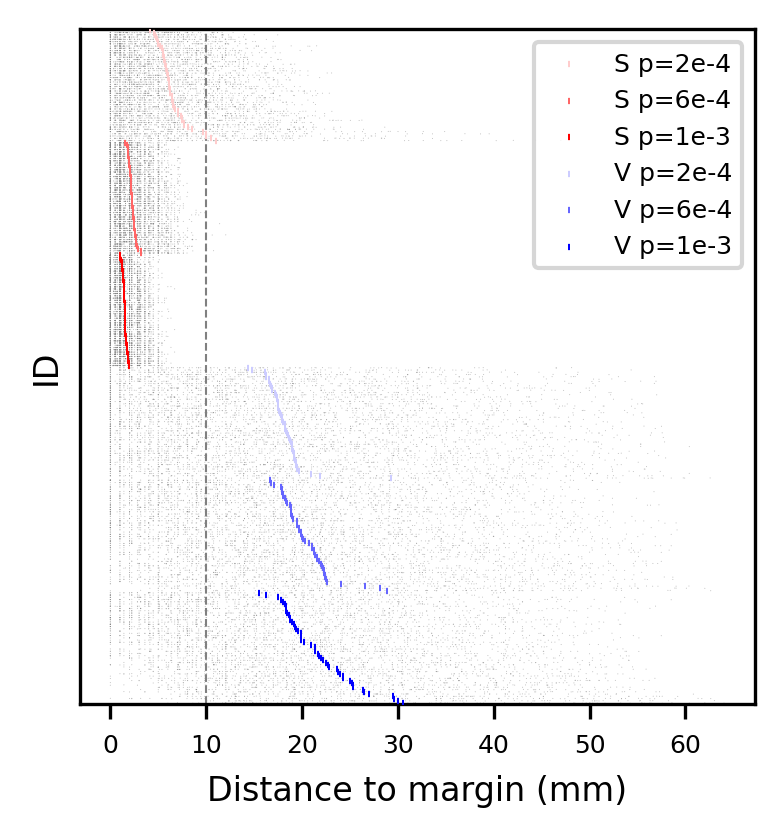

SourceDataFig4dii


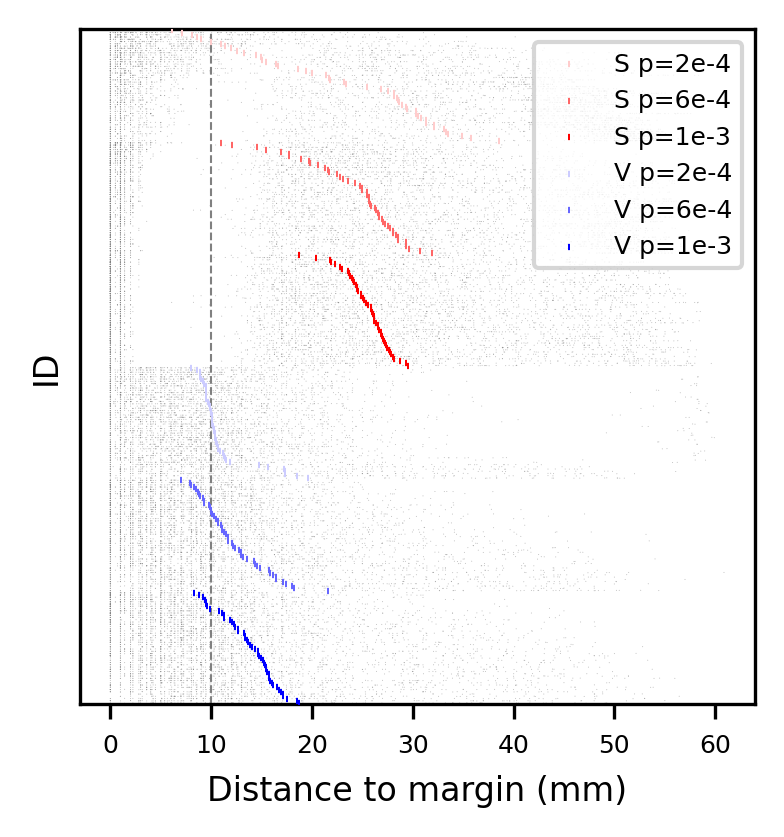

In [19]:
read_and_plot(excelfile.sheet_names)

# Extended Data Figure 7a

In [22]:
path_to_excelfile = os.path.join(
    path_to_all_source_data,
    "Source_Data_Extended_Data_Figure_7",
    "SourceData_ExtendedData_Fig7a.xlsx"
)

In [23]:
excelfile = pd.ExcelFile(path_to_excelfile)
excelfile.sheet_names

['SourceDataEDFig7ai', 'SourceDataEDFig7aii']

SourceDataEDFig7ai


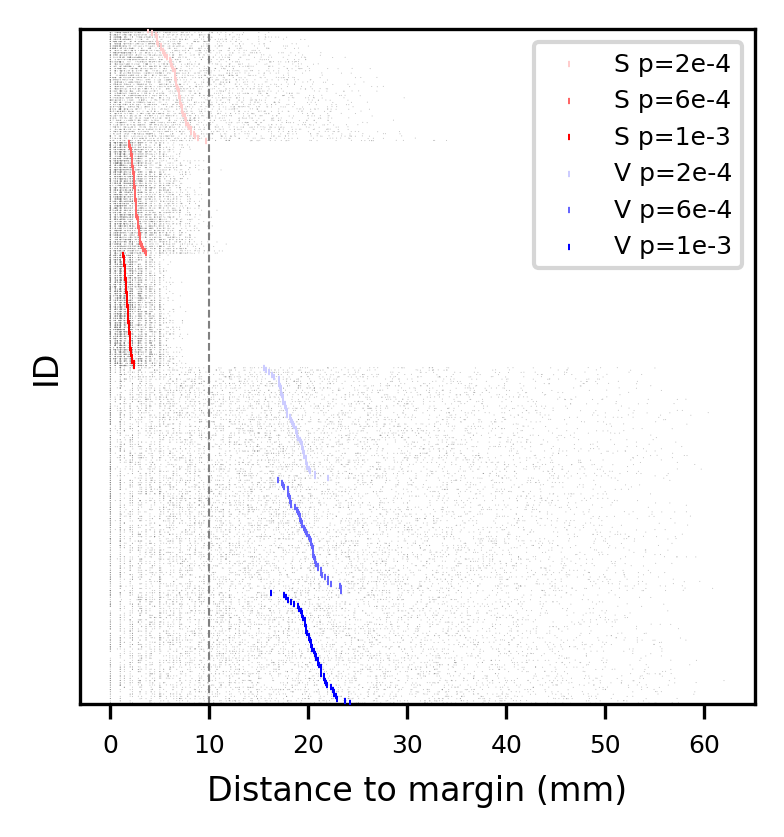

SourceDataEDFig7aii


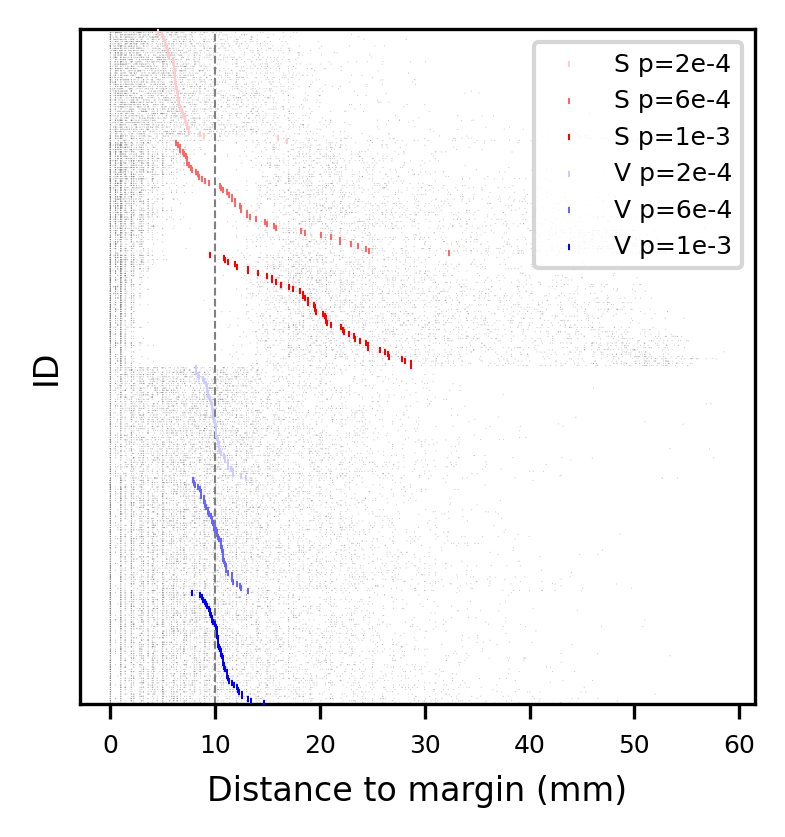

In [24]:
read_and_plot(excelfile.sheet_names)